# 使用SVM检测蘑菇🍄是否有毒

需要在标有TODO的地方添加代码.

使用的数据集: https://archive.ics.uci.edu/ml/datasets/mushroom
 
数据集中每一条数据包含如下特征, 特征包括对蘑菇形状, 质地, 色彩等特征的描述, 我们需要以此判断🍄是否有毒(p)或者可以吃(e). 为两个类别的分类问题.

1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s 
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s 
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y 
4. bruises?: bruises=t,no=f 
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s 
6. gill-attachment: attached=a,descending=d,free=f,notched=n 
7. gill-spacing: close=c,crowded=w,distant=d 
8. gill-size: broad=b,narrow=n 
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y 
10. stalk-shape: enlarging=e,tapering=t 
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=? 
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s 
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s 
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y 
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y 
16. veil-type: partial=p,universal=u 
17. veil-color: brown=n,orange=o,white=w,yellow=y 
18. ring-number: none=n,one=o,two=t 
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z 
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y 
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y 
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

In [1]:
import pandas as pd
import numpy as np

# 导入数据
mush_df = pd.read_csv('mushrooms.csv')

# 将值从字母转换为
mush_df_encoded = pd.get_dummies(mush_df)

mush_df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [2]:
mush_df_encoded.head()

,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [3]:
# 将特征和类别标签分布赋值给 X 和 y
X_mush = mush_df_encoded.iloc[:,2:]
y_mush = mush_df_encoded.iloc[:,1]

In [4]:
print(mush_df_encoded[mush_df_encoded['class_e']==1].shape[0],mush_df_encoded[mush_df_encoded['class_p']==1].shape[0])

4208 3916


## 训练SVM

### 建立寻pipeline

In [5]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

# TODO
pca = PCA(n_components=9, whiten=True, random_state=22)
svc = SVC(class_weight='balanced')
model = make_pipeline(pca, svc)

### 将数据分为训练和测试数据

In [6]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_mush, y_mush,
                                                random_state=41)

### 调参:通过交叉验证寻找最佳的 C (控制间隔的大小)

In [12]:
from sklearn.model_selection import GridSearchCV

# TODO
param_grid = {
#     'svc__C': [1,5,10,50],
    'svc__kernel': ['linear','poly','rbf']
}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

CPU times: user 22.5 s, sys: 679 ms, total: 23.2 s
Wall time: 5 s
{'svc__kernel': 'rbf'}


### 使用训练好的SVM做预测

In [13]:
# TODO
model = grid.best_estimator_
yfit = model.predict(Xtest)

### 生成性能报告

In [14]:
from sklearn.metrics import classification_report
print(classification_report(ytest,yfit, target_names=['1','0']))

             precision    recall  f1-score   support

          1       1.00      1.00      1.00      1047
          0       1.00      1.00      1.00       984

avg / total       1.00      1.00      1.00      2031



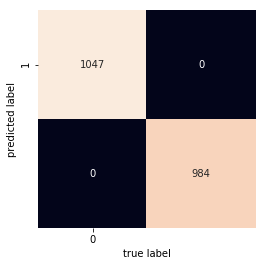

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

mat = confusion_matrix(ytest,yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels='0',
            yticklabels='1')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()